# Part I - (Prosper Loan Dataset)
## by (Hikmat)

## Introduction

#### PROPER LOAN DATASET
   This is a loan dataset from prosper, This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I would only concentrate on few variables and not all the 18 variables. The variables are explained below;
ListingKey: 	Unique key for each listing, same value as the 'key' used in the listing object in the API.
ListingNumber: 	The number that uniquely identifies the listing to the public as displayed on the website.
ListingCreationDate:	The date the listing was created.
CreditGrade:	The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
Term:	The length of the loan expressed in months.
LoanStatus:	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue: The PastDue status will be accompanied by a delinquency bucket.
ClosedDate:	Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 
BorrowerAPR:	The Borrower's Annual Percentage Rate (APR) for the loan.
BorrowerRate:	The Borrower's interest rate for this loan. 
LenderYield:	The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
EstimatedEffectiveYield: 	Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.
EstimatedLoss:	Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.
EstimatedReturn:	The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
ProsperRating (numeric):	The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
ProsperRating (Alpha):	The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
ProsperScore:	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
ListingCategory:	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import seaborn as sns
print(sns.__version__)


0.8.1


In [3]:
df = pd.read_csv('prosperLoanData.csv')

### What is the structure of your dataset?

> The structure of this dataset is a tabular structure, where the data is organized into rows and columns. Each row represents a single loan and its attributes, and each column represents a specific attribute of the loan. There are 81 columns in this dataset. This dataset contains information about loans and their characteristics, and can be used for various data analysis and modeling tasks, such as credit risk analysis or forecasting loan performance. The structure of the data is well organized and contains relevant information for these types of analyses.

### What is/are the main feature(s) of interest in your dataset?

> The main features in the dataset inccludes;
LoanOriginalAmount: The original loan amount requested by the borrower
Term: The length of the loan
BorrowerAPR: The annual percentage rate for the loan
BorrowerRate: The interest rate for the loan
ProsperRating (numeric): A numeric rating of the borrower's credit risk
ProsperScore: A score reflecting the borrower's credit risk
Employment: The borrower's employment status
EmploymentDuration: The length of time the borrower has been in their current employment status
IsBorrowerHomeowner: Whether or not the borrower owns a home
CreditScoreRangeLower/Upper: The range of the borrower's credit score
MonthlyIncome: The borrower's stated monthly income
LoanOriginationDate: The date the loan was originated
LoanOriginationQuarter: The quarter the loan was originated
DebtToIncomeRatio: The ratio of the borrower's debt to their income
LoanStatus: The current status of the loan
ClosedDate: The date the loan was closed, if applicable

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some of the variables that will mostly be focused on are: LenderYield,BorrowerAPR,BorrowerRate,EmploymentStatus,CreditGrade,ProsperRating,IncomeRange,LoanOriginalAmount,Occupation,ProsperScore,EmploymentStatusDuration,CreditScoreRaangeLower,CreditScoreRangeUpper.


## Univariate Exploration


In [4]:
# check few data
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# check the description of the data
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
#check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### Question
  What is the distribution of the lenderyield

In [7]:
# create a function
def set_plot_labels(title, x_label, y_label):
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

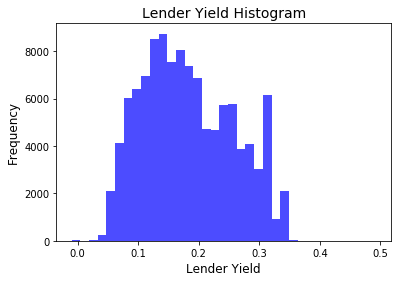

In [8]:
# create a histogram plot using LenderYield
bins= np.arange(0,df['LenderYield'].max() +0.07,0.07)
plt.hist(data= df, x ='LenderYield',bins = 35,color = 'blue',alpha = 0.7)
set_plot_labels("Lender Yield Histogram", "Lender Yield", "Frequency")
plt.show();

### Observations
   The lenderyield distribution is non uniform

### Question
what is the distribution of the borrowerapr

25
0


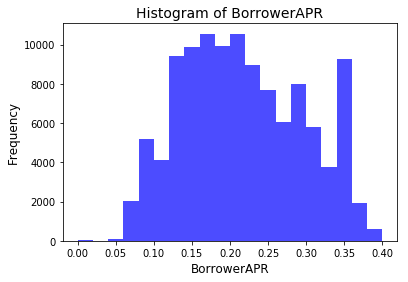

In [9]:
# check for NaN or infinite values
print(df["BorrowerAPR"].isnull().sum())
print(np.isinf(df["BorrowerAPR"]).sum())

# replace NaN or infinite values with the mean of the data
df["BorrowerAPR"].fillna(df["BorrowerAPR"].mean(), inplace=True)
df["BorrowerAPR"] = df["BorrowerAPR"].replace([np.inf, -np.inf], df["BorrowerAPR"].mean())
# Apply log transformation to the BorrowerAPR column
df['log_BorrowerAPR'] = np.log10(df['BorrowerAPR'])
# plot the histogram
plt.hist(df["BorrowerAPR"], bins=20, range=(0, 0.4), color='blue', alpha=0.7)
set_plot_labels('Histogram of BorrowerAPR', 'BorrowerAPR', "Frequency")
plt.show();

### Observation
The borrower apr can be said to be right skewed...more values fall on the right path

### Question
  what is the frequency of the BorrowerRate

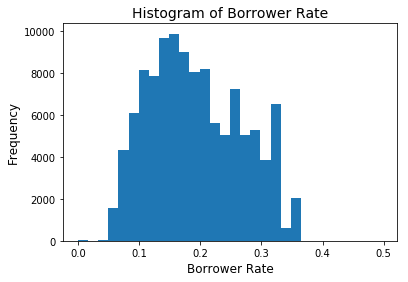

In [10]:
# plot the histogram
plt.hist(df['BorrowerRate'], bins=30)
# add labels and title
set_plot_labels('Histogram of Borrower Rate', 'Borrower Rate', "Frequency")
# show the plot
plt.show();

### Observations
 The frequency of the borrowerate is more to the leftside

### Question
what is the frequency of loanstatus?

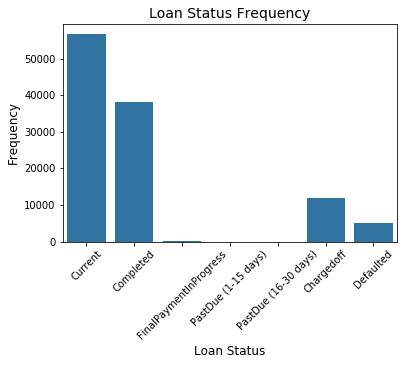

In [11]:
# Create a new column for the loan status with the desired order
df['LoanStatusOrder'] = pd.Categorical(df['LoanStatus'], categories=['Current', 'Completed', 'FinalPaymentInProgress', 'PastDue (1-15 days)', 'PastDue (16-30 days)', 'Chargedoff', 'Defaulted'], ordered=True)
base_color = sns.color_palette()[0]
# Plot the frequency of each LoanStatus using a bar chart
sns.countplot(data=df, x='LoanStatusOrder', color=base_color)

# set the title and labels for the chart
set_plot_labels("Loan Status Frequency", "Loan Status", "Frequency")

# Rotate the x-tick labels to make them readable
plt.xticks(rotation=45)
# Display the chart
plt.show();


### Observation
The frequency of the loan status as seen that most people are still currently paying their loan,while only like 3800 people have completed theirs and up to 1400 people were charged off with only few defaulting and less than 500 past due date.

### Question
what is the distribution of the employment status?

In [12]:
# Remove the 'not available' in the employment column
value_to_remove = "Not available"
df = df[df["EmploymentStatus"] != value_to_remove]
df["EmploymentStatus"].unique()

array(['Self-employed', 'Employed', 'Full-time', 'Other', nan,
       'Not employed', 'Part-time', 'Retired'], dtype=object)

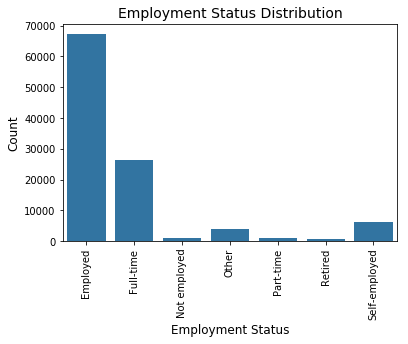

In [13]:
# Group the data by employment and calculate the count of each
grouped = df.groupby("EmploymentStatus").size().reset_index(name="Count")
#Plot the bar chart using the sns.barplot function
base_color = sns.color_palette()[0]
sns.barplot(x="EmploymentStatus", y="Count", data=grouped,color = base_color)
set_plot_labels("Employment Status Distribution","Employment Status", "Count")
plt.xticks(rotation=90)
plt.show();

### Observation
From the bar chart above we can see that the people that are employed are far more than the full-time or self employed with up to 6800 count.

### Question
 what is the density distribution of the original loan amount

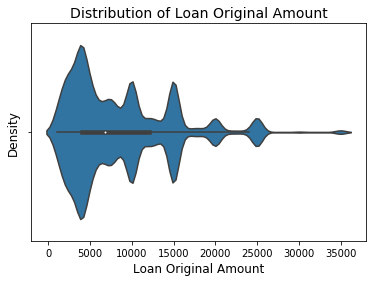

In [14]:
# Create a violin plot of LoanOriginalAmount
sns.violinplot(x="LoanOriginalAmount", data=df)
# Set the plot title and axis labels
set_plot_labels("Distribution of Loan Original Amount","Loan Original Amount", "Density")
# Show the plot
plt.show();

### Observation
 It can be seen that the density of the original loan amount is very high between 0-5000 and has outliers around 35000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I created a log transformation for the borrower's apr column , when the first result was positively skewed to the right with more values at the right side.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I checked for Nan and infinite values in the BorrowerAPR Column , then replaced it with the mean of the data
  I removed the "Not Employed" value in the employment status column.

## Bivariate Data

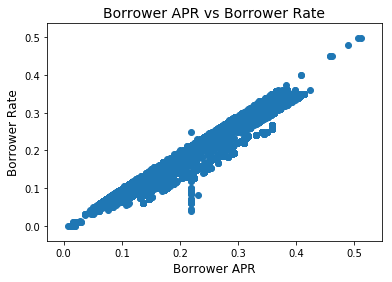

In [15]:
#load the data
borrower_apr = df['BorrowerAPR']
borrower_rate = df['BorrowerRate']
# Plot the scatter chart
plt.scatter(borrower_apr, borrower_rate)

# Add axis labels and a title
set_plot_labels('Borrower APR vs Borrower Rate','Borrower APR','Borrower Rate')
# Show the plot
plt.show();

### Observation
The relationship between Borrower APR and BorrowerRate is a strong positive linear relationship, the higher the borrowerAPR the higher the BorrowerRate 

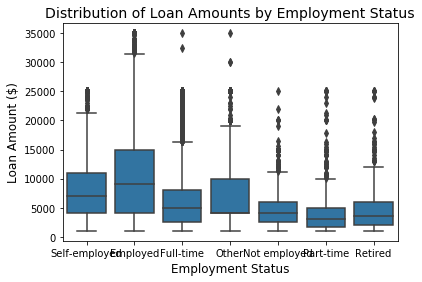

In [16]:
# Create boxplot using seaborn
base_color = sns.color_palette()[0]
sns.boxplot(x='EmploymentStatus', y='LoanOriginalAmount', data = df, color = base_color)
# Set plot title and axis labels
set_plot_labels('Distribution of Loan Amounts by Employment Status','Employment Status','Loan Amount ($)')
# Display the plot
plt.show();

### Observation
We can see that the people that are employed collected large loan amounts

### Question
 How does the distribution of Prosperrating differ with BorrowerAPR?

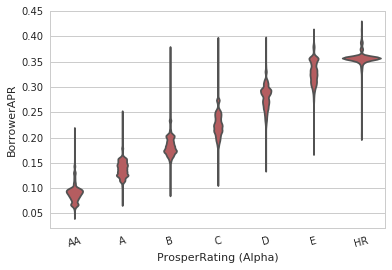

In [17]:
# Create the violin plot
sns.set(style="whitegrid")
base_color = sns.color_palette()[2]
# Create a list of the ProsperRating values in the desired order
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sns.violinplot(x="ProsperRating (Alpha)", y="BorrowerAPR", data=df,color = base_color,inner = None, order = rating_order)
plt.xticks(rotation= 15)
# Show the plot
plt.show();

### Observation
 The HR density is the highest because the majority of the datapoints lies there and it also has a very large outlier

### Question
What is the distribution of loanamount by the prosper score?

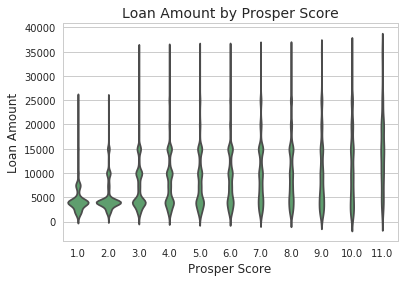

In [18]:
# Create the violin plot
base_color = sns.color_palette()[1]
sns.violinplot(x='ProsperScore', y='LoanOriginalAmount', data=df, color = base_color, inner = None)

# Add labels to the plot
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15,10)})
set_plot_labels('Loan Amount by Prosper Score','Prosper Score','Loan Amount')
plt.show();

### Observation
 Those with a prosper score of 2.0 have a high density and those with propser score of 11.0 have many more outliers

### Question
  What is the relationship between BorrowerAPR and BorrowerRate? 

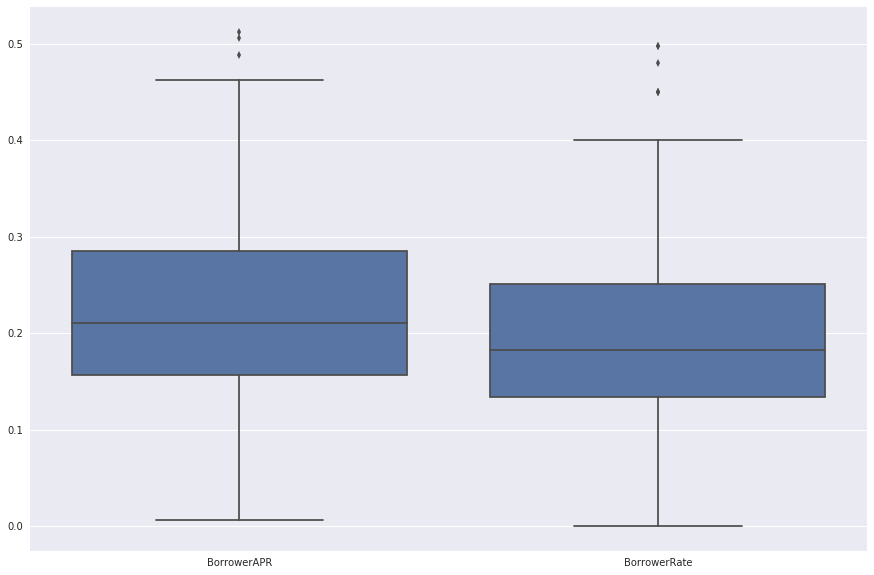

In [19]:
# create the boxplot
base_color = sns.color_palette()[0]
sns.boxplot(data=df[['BorrowerAPR', 'BorrowerRate']],color = base_color)
plt.show();

### Observation
 From the box plot above, we can see that the minimum borrowerrate is 0.0 while that of borrowerapr is 0.1 and the Q1 of borrowerrate is 0.13 and that of borrowerapr is 0.16. In conclusion borrower apr is slightly higher than borrowerrate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the box plot and scatter plot we can see that the relationship between BorrowerApr and BorrowerRate is linear and the higher the borrower rate the higher the borrowerapr.
 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, in the first violin plot ,the distribution betwwen BorrowerApr and prosper rating ,it can be seen that the density of the HR is the highest because the majority of the datapoints lies there and it also has a very large outlier

## Multivariate Exploration


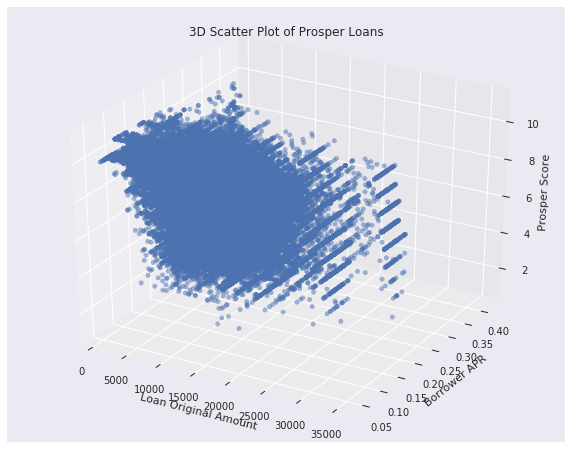

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the columns we want to use
x = df['LoanOriginalAmount']
y = df['BorrowerAPR']
z = df['ProsperScore']

# Create the figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(x, y, z, s=20, alpha=0.5)

# Set the axis labels and title
ax.set_xlabel('Loan Original Amount')
ax.set_ylabel('Borrower APR')
ax.set_zlabel('Prosper Score')
ax.set_title('3D Scatter Plot of Prosper Loans')

# Show the plot
plt.show();


### Observation
 From the 3d scatterplot we can see it being clustered and an outlier at a prosperscore of 10 

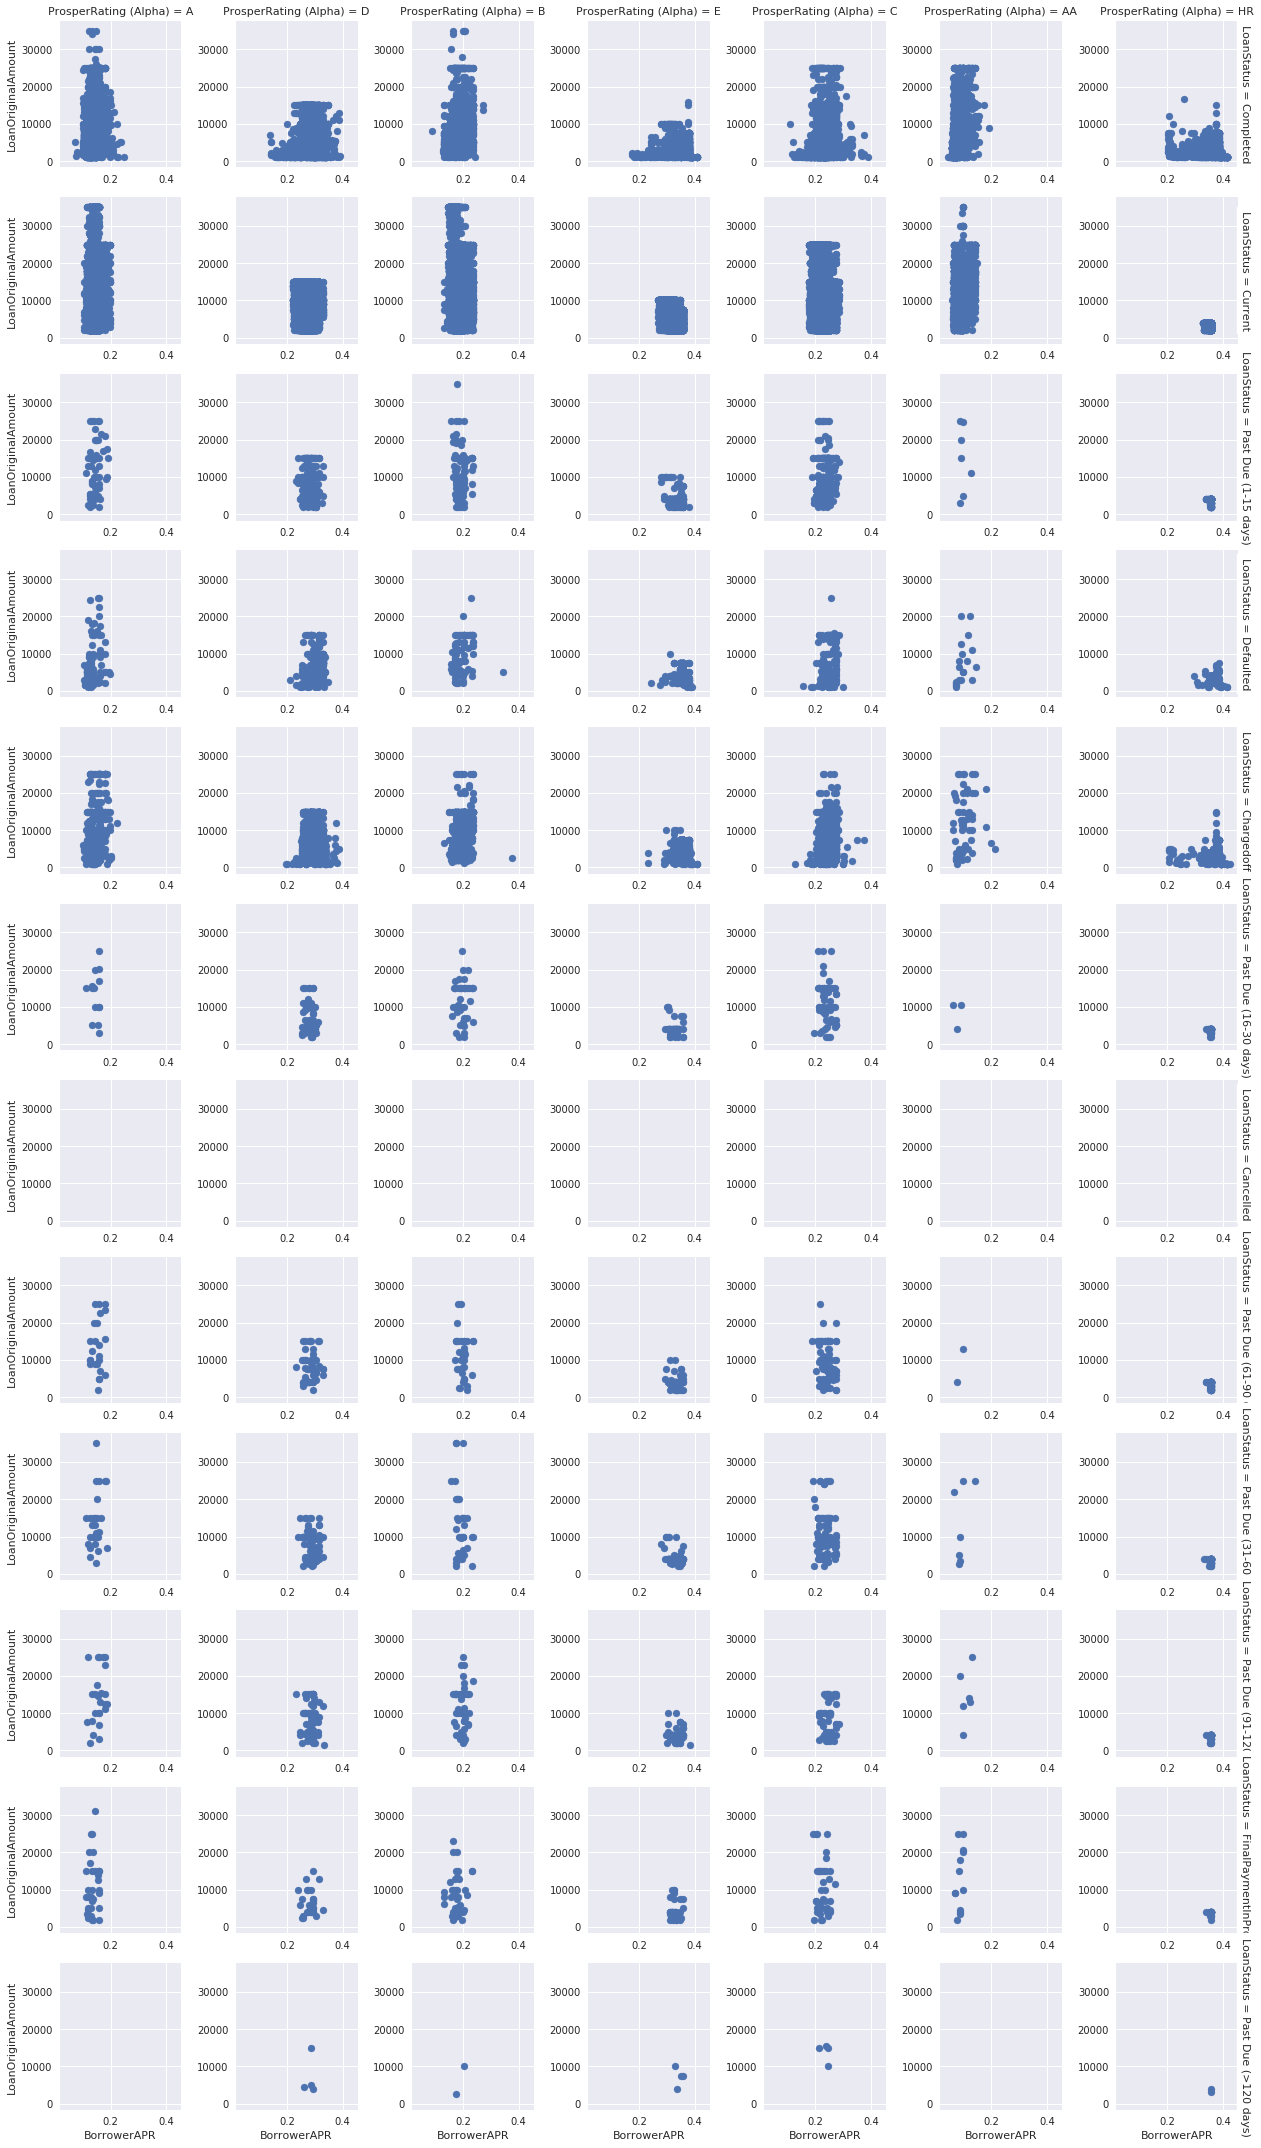

In [21]:
# Create the FacetGrid object
g = sns.FacetGrid(df, row="LoanStatus", col="ProsperRating (Alpha)",size = 2.5,margin_titles = True)

# Map the scatterplot function to the FacetGrid
g.map(plt.scatter, "BorrowerAPR", "LoanOriginalAmount")

# Show the plot
plt.show();


### Observation
 By looking at the scatter plots in each subplot, we can observe how the relationship between the loan original amount and borrowerapr changes across different categories of the prosper rating and loan status. We can see patterns in the data, such as  the relationship is stronger for loan status which are completed or current and  weaker for loan status which are past due or greater than 30 days.

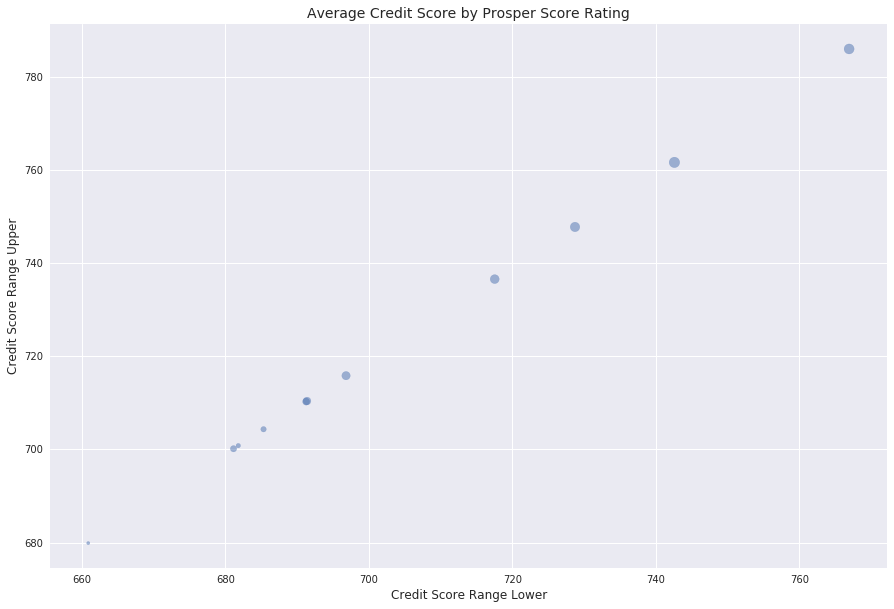

In [22]:
# Filter the data to only include complete loans with available credit information
complete_loans = df[(df['LoanStatus'] == 'Completed') & (df['CreditScoreRangeLower'].notna()) & (df['CreditScoreRangeUpper'].notna())]

# Calculate the average credit score for each Prosper score rating
grouped = complete_loans.groupby('ProsperScore').agg({'CreditScoreRangeLower': 'mean', 'CreditScoreRangeUpper': 'mean'})

# Create a scatter plot with size encoding
plt.scatter(grouped['CreditScoreRangeLower'], grouped['CreditScoreRangeUpper'], s=grouped.index*10, alpha=0.5)

# Add axis labels and title
set_plot_labels('Average Credit Score by Prosper Score Rating','Credit Score Range Lower','Credit Score Range Upper')
plt.show();


### Observation
 From this size encoding chart we can see that there is a strong correlation between credit score range lower and credit score range upper ... The size of the circle increases as the value increases.

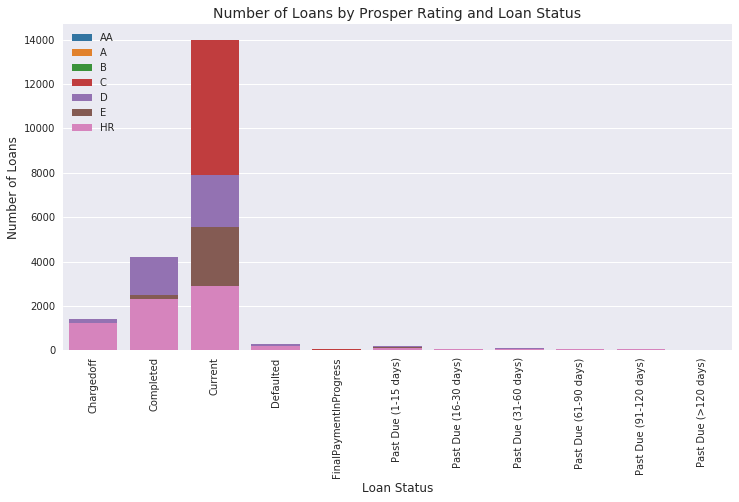

In [23]:
# Group by Prosper Rating and Loan Status, and count the number of loans
grouped = df.groupby(['ProsperRating (Alpha)', 'LoanStatus']).size().reset_index(name='count')

# Pivot the table to get Prosper Ratings as columns and Loan Status as rows
pivoted = grouped.pivot(index='LoanStatus', columns='ProsperRating (Alpha)', values='count')

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the clustered bar chart
sns.barplot(data=pivoted, x=pivoted.index, y='AA', color='tab:blue', label='AA')
sns.barplot(data=pivoted, x=pivoted.index, y='A', color='tab:orange', label='A')
sns.barplot(data=pivoted, x=pivoted.index, y='B', color='tab:green', label='B')
sns.barplot(data=pivoted, x=pivoted.index, y='C', color='tab:red', label='C')
sns.barplot(data=pivoted, x=pivoted.index, y='D', color='tab:purple', label='D')
sns.barplot(data=pivoted, x=pivoted.index, y='E', color='tab:brown', label='E')
sns.barplot(data=pivoted, x=pivoted.index, y='HR', color='tab:pink', label='HR')

# Add labels and title
set_plot_labels('Number of Loans by Prosper Rating and Loan Status','Loan Status','Number of Loans')
plt.xticks(rotation=90)
# Add legend
plt.legend();


### Observation
From the stacked bar chart, you can observe that the current loan status has the highest number of loans with th 'c' prosperrating being up to 6000, followed by the completed loan status with HR having up to 2200 number of loans and those with chargedoff having up to 1000 'HR'. 

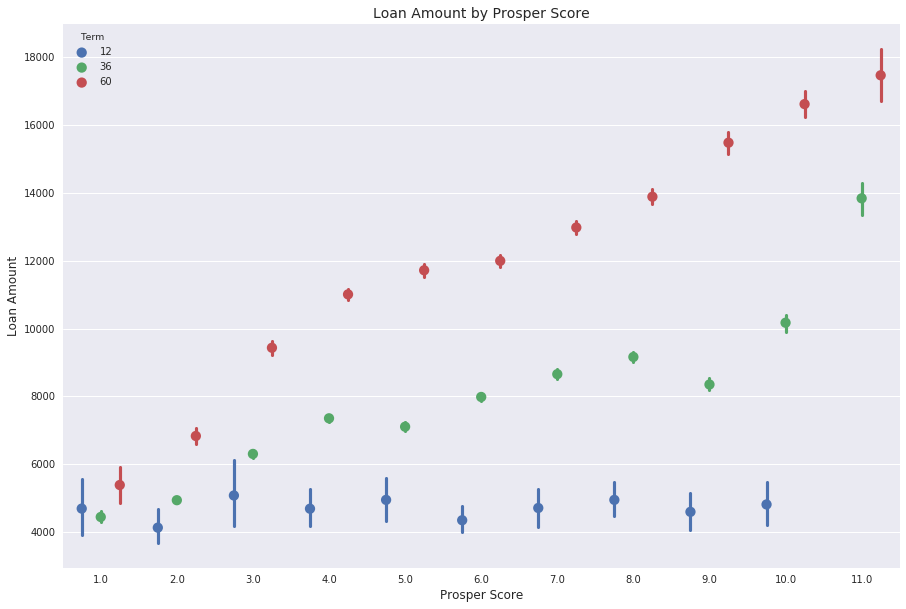

In [24]:
# Create a pointplot of LoanOriginalAmount by ProsperScore, with a hue for Term
sns.pointplot(x="ProsperScore", y="LoanOriginalAmount", hue="Term", dodge = 0.5,linestyles = "", data=df)

# Set the title and axis labels
set_plot_labels('Loan Amount by Prosper Score','Prosper Score','Loan Amount')
# Show the plot
plt.show();

### Observation
There is a strong correlation between the loan amount by prosperscore 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed that the loan amount tends to increase with the borrower's income and employment status. These kinds of relationships could strengthen each other in terms of looking at the feature(s) of interest, as they provide more information and context around the data.

### Were there any interesting or surprising interactions between features?

> I noticed that loans with longer terms tend to have higher interest rates. 

## Conclusions
>The Prosper Loan dataset provided insights into the factors that affect the Borrower's Annual Percentage Rate (APR) and the loan status. The analysis of the dataset revealed that there is a negative correlation between the borrower's APR and the Prosper Score, Credit Score, and Loan Original Amount. The analysis also revealed that certain factors like employment status, income range, and debt-to-income ratio have an impact on loan status, loan amount, and borrower APR.
The exploration of the dataset also revealed that there are significant differences in the loan performance and borrower behavior between different income ranges, employment status, and loan purposes. The analysis of loan purposes revealed that the loans that were taken for debt consolidation have a higher loan amount and APR compared to other loan purposes. The exploration of the dataset revealed that a significant proportion of loans were taken for debt consolidation, followed by other purposes such as home improvement, business, and student loans.
Overall, the analysis of the Prosper Loan dataset revealed that various factors such as Prosper Score, Credit Score, Loan Original Amount, Employment Status, Income Range, Debt-to-Income Ratio, and Loan Purpose have a significant impact on loan performance, loan amount, and borrower APR.